In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import statsmodels.api as sm
import seaborn as sns
import warnings
from statsmodels.tsa.stattools import acf, pacf
warnings.filterwarnings("ignore")

In [2]:
path = r'data\M5_full.parquet'
df = pd.read_parquet(path)

In [3]:
df['date'] = pd.to_datetime(df['date'])

In [4]:
df['year_month'] = df['date'].dt.to_period('M')

In [30]:
df['store_id'].unique()

['CA_1', 'CA_2', 'CA_3', 'CA_4', 'TX_1', 'TX_2', 'TX_3', 'WI_1', 'WI_2', 'WI_3']
Categories (10, object): ['CA_1', 'CA_2', 'CA_3', 'CA_4', ..., 'TX_3', 'WI_1', 'WI_2', 'WI_3']

##### Lag

##### Vou tentar analisar em todos os níveis e ver mais ou meenos os lags



In [25]:
def create_bases(df, cols):
    result = {}
    df_general = df.groupby('year_month')['value'].sum().reset_index().set_index('year_month')
    result['general'] = df_general

    df_

    for col in cols:
        grouped_df = df.groupby([col, 'year_month'])['value'].sum().reset_index().set_index('year_month')
        print(col)
        result.update(grouped_df.drop(col, axis=1))

        for cat in df[col].unique():
            filter = grouped_df[col] == cat
            final_df = grouped_df[filter].drop(col, axis=1)
            result[cat] = final_df

    return result


In [26]:
colunas = ['dept_id','store_id','cat_id','state_id']
list_dfs = create_bases(df, colunas)

dept_id
store_id
cat_id
state_id


In [9]:
def acf_pacf(x, key,qtd_lag):
    fig = plt.figure(figsize=(16, 10))
    
    fig.suptitle(key, fontsize=20, y=0.95)
    
    ax1 = fig.add_subplot(221)
    sm.graphics.tsa.plot_acf(x, lags=qtd_lag, ax=ax1)
    ax1.set_title('Autocorrelation', fontsize=15)
    
    ax2 = fig.add_subplot(222)
    sm.graphics.tsa.plot_pacf(x, lags=qtd_lag, ax=ax2)
    ax2.set_title('Partial Autocorrelation', fontsize=15)
    
    plt.tight_layout(rect=[0, 0, 1, 0.93])
    plt.show()


##### Plotando todos os ACFs

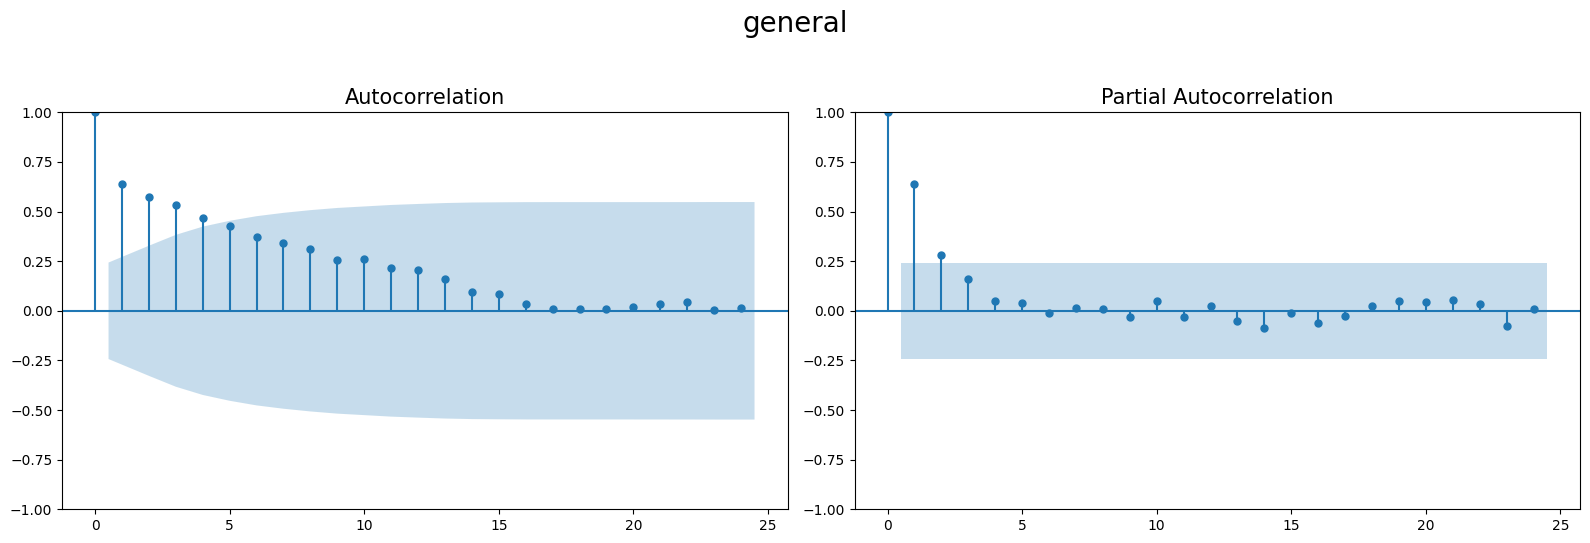

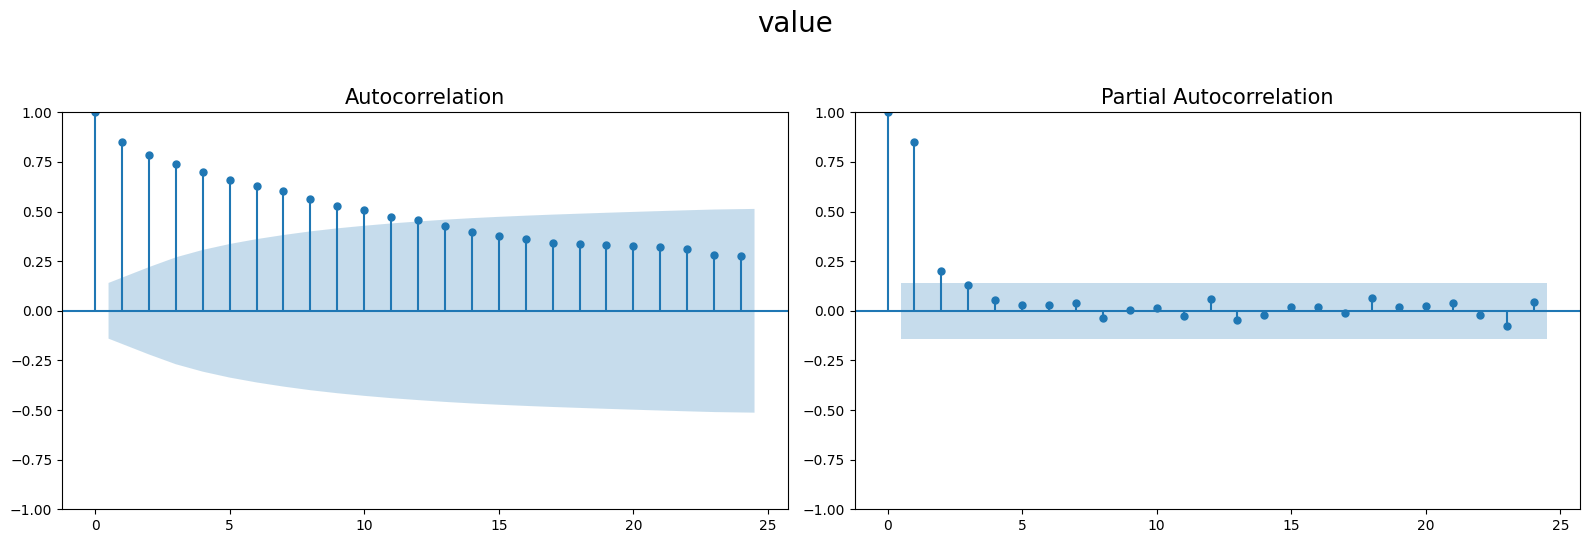

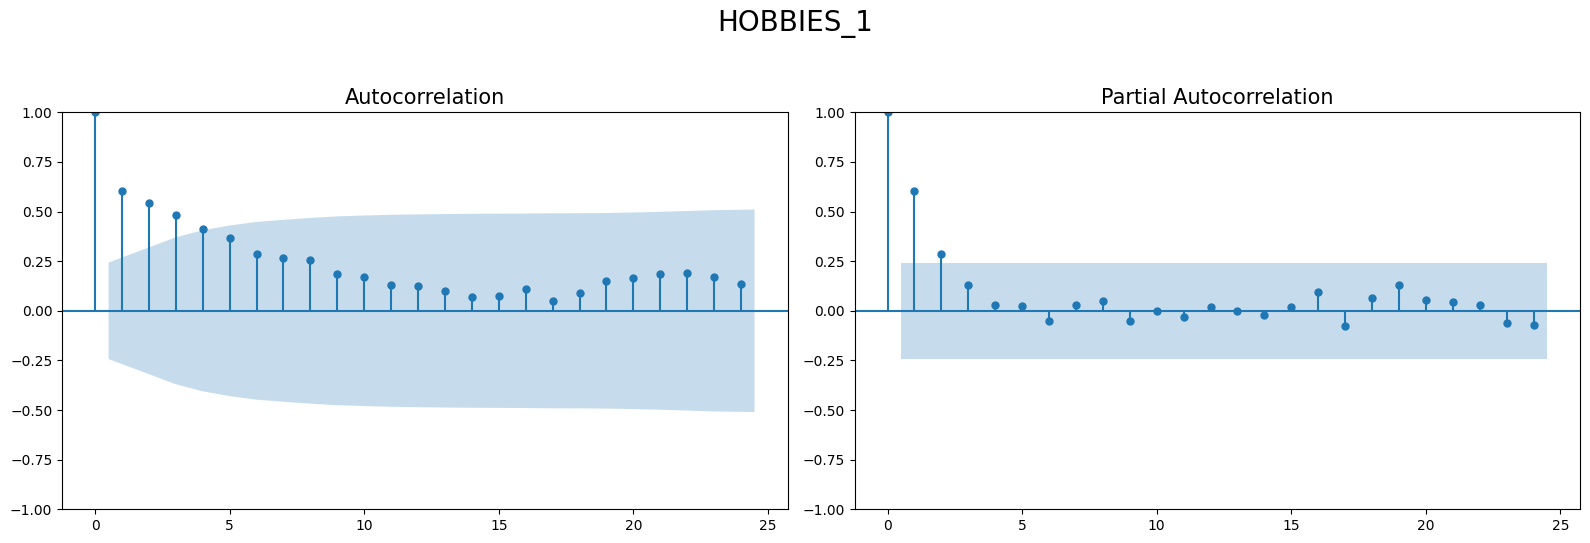

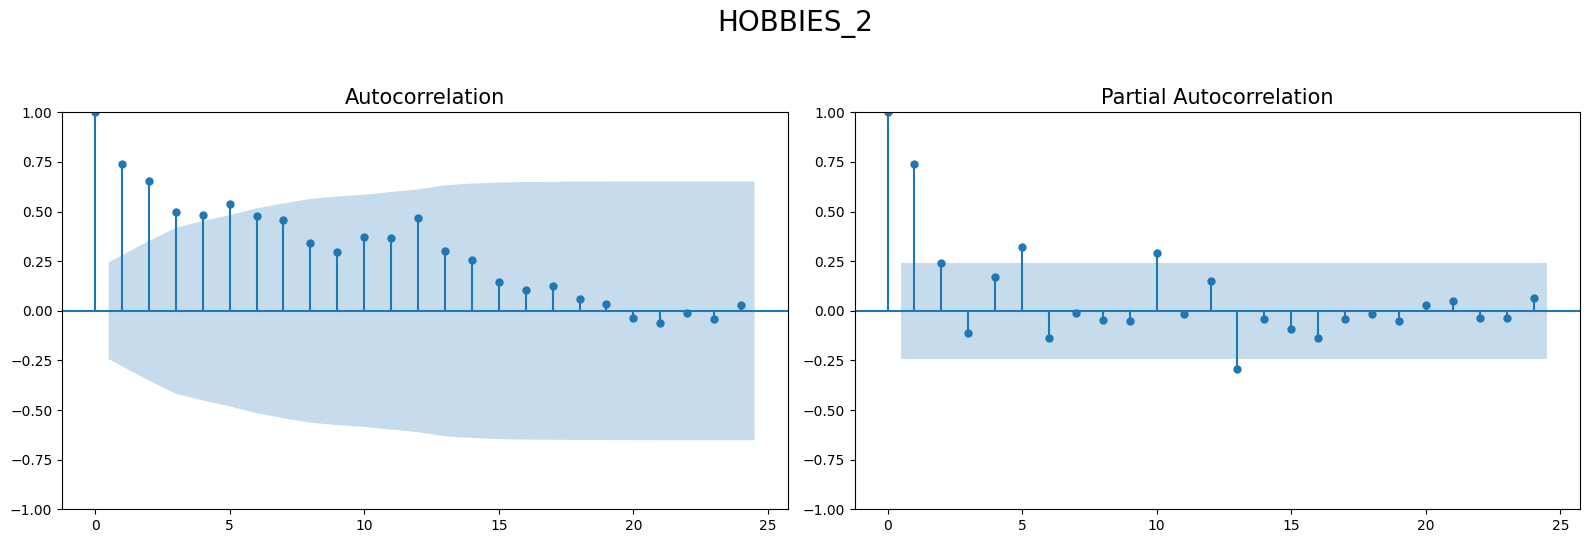

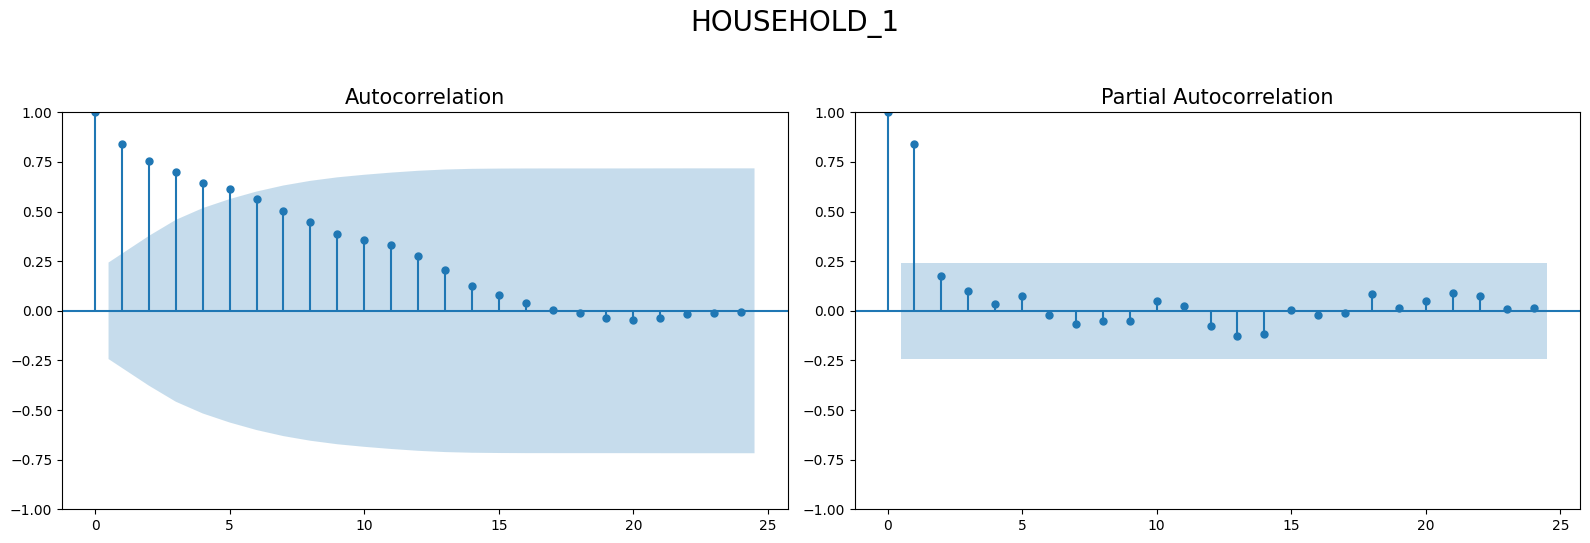

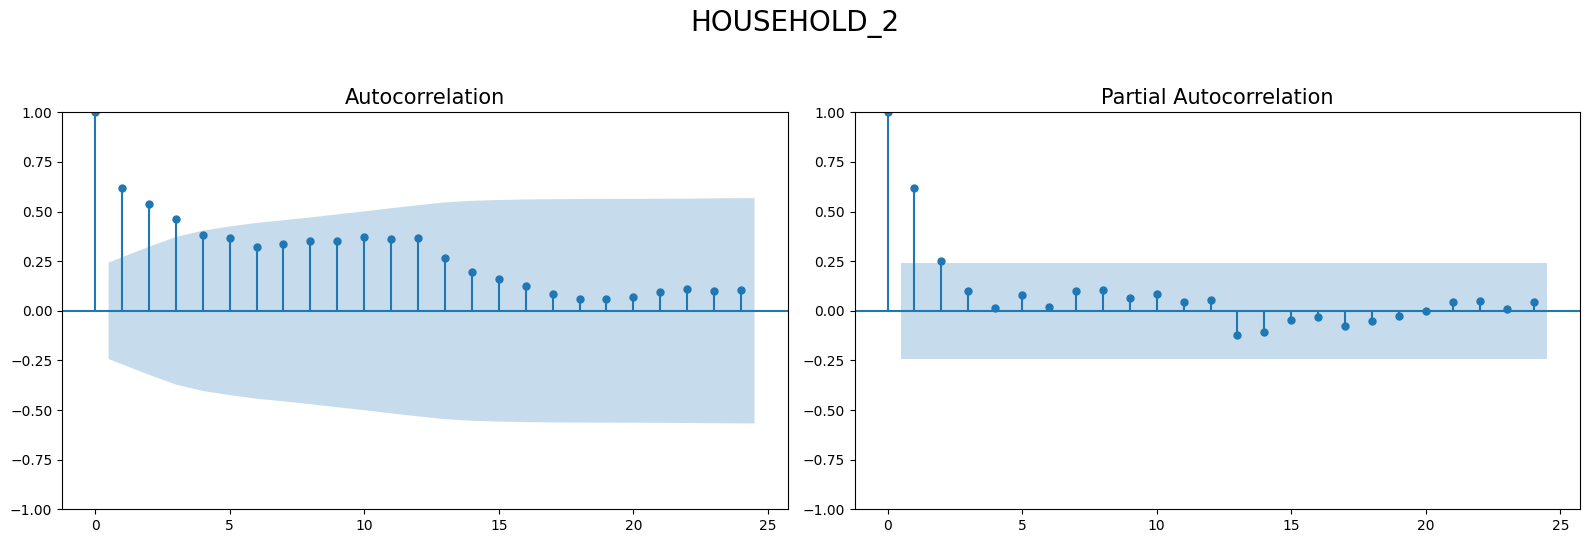

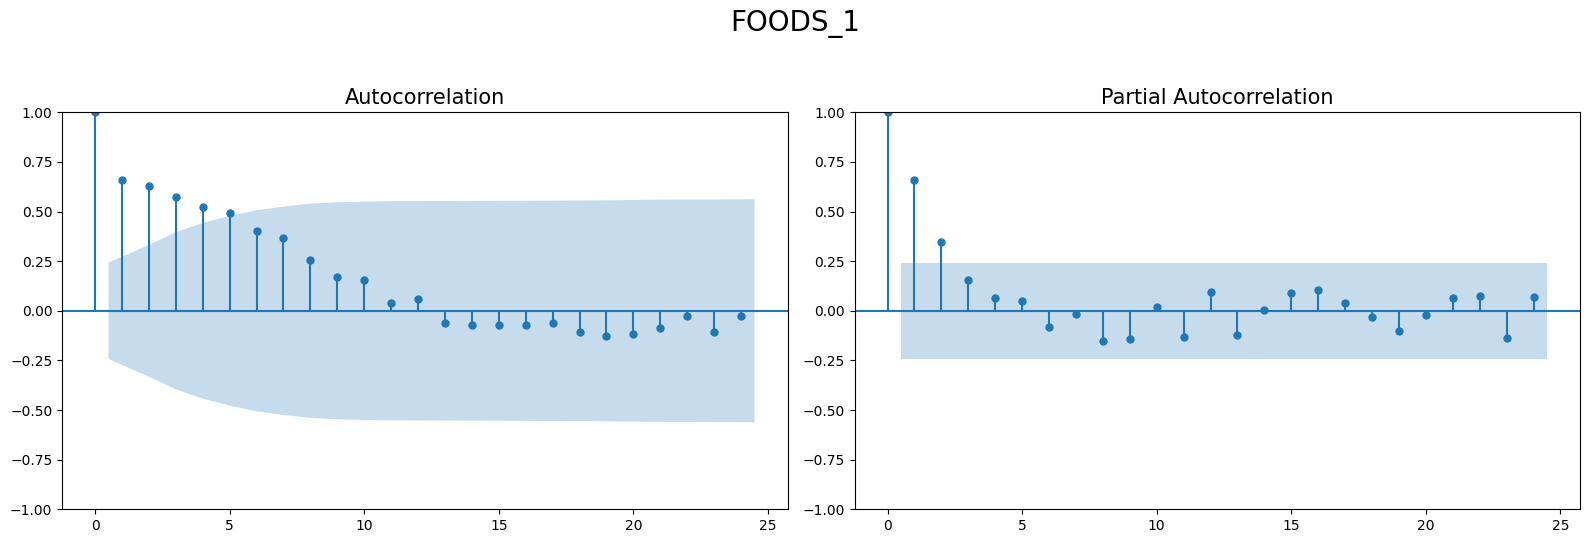

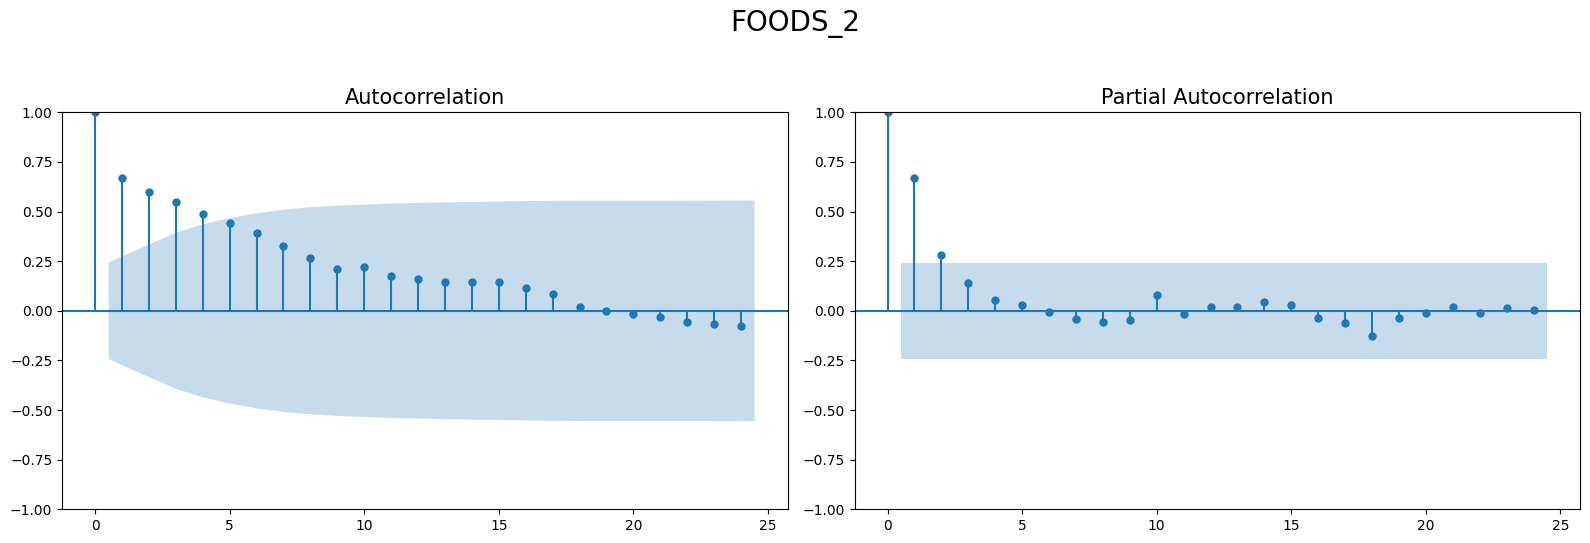

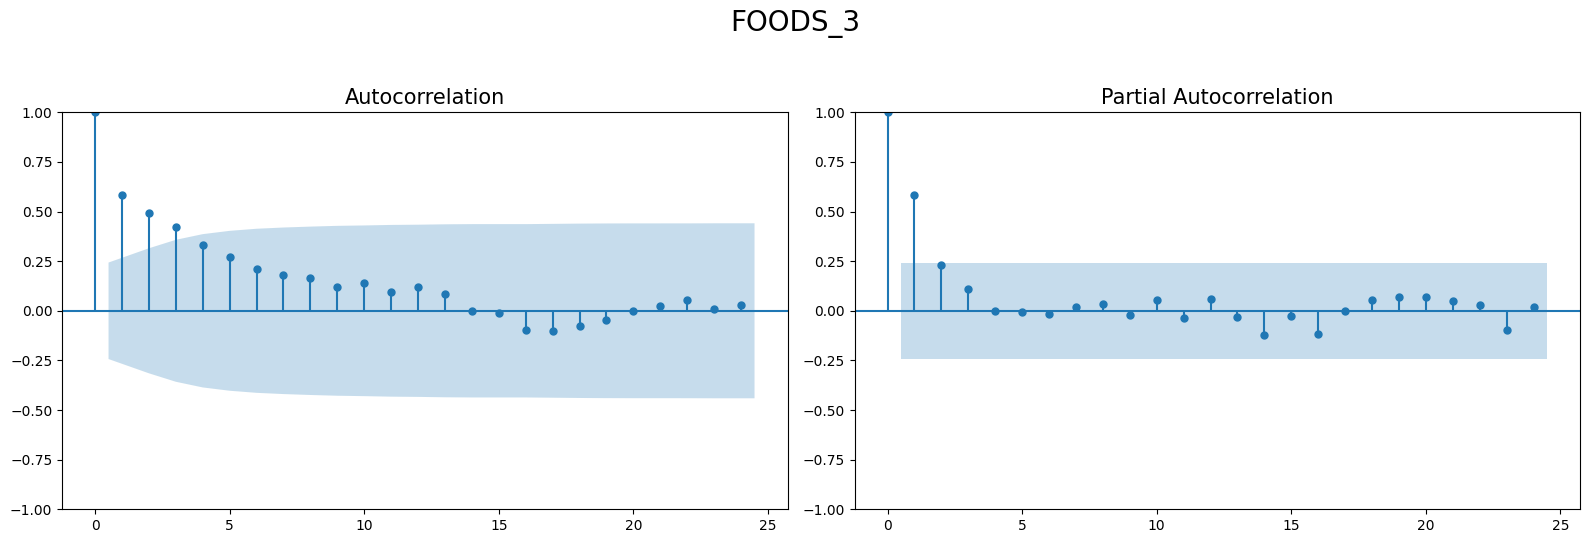

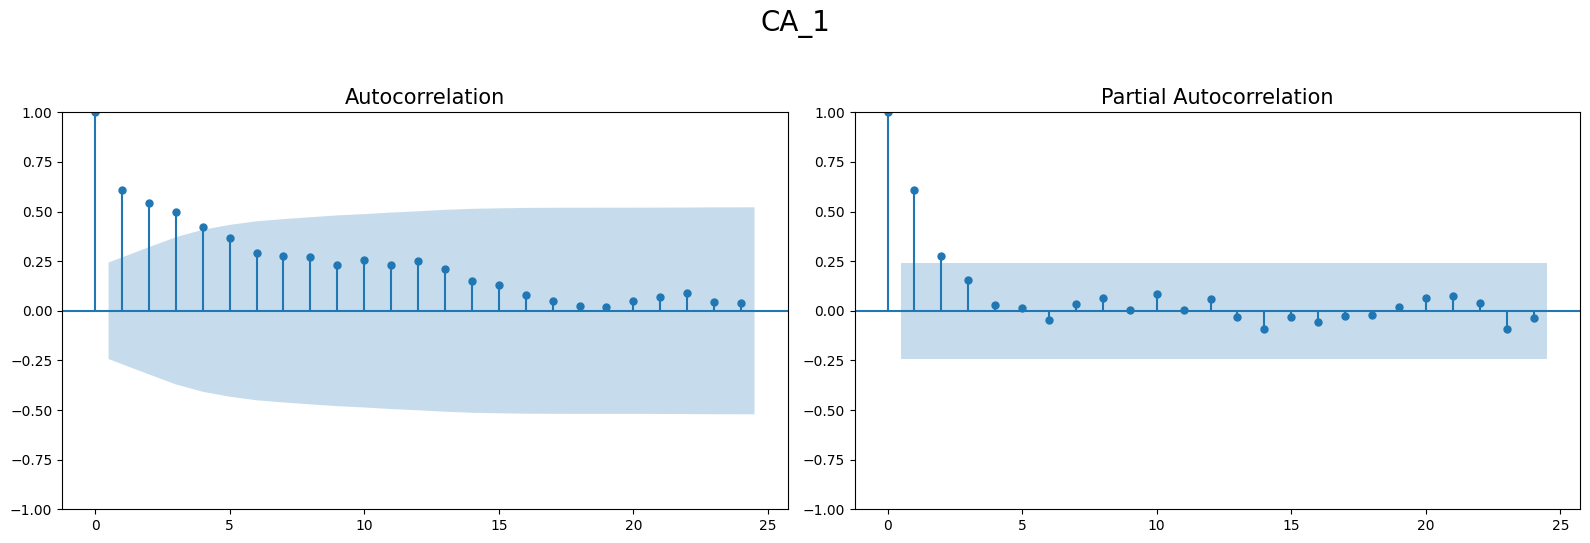

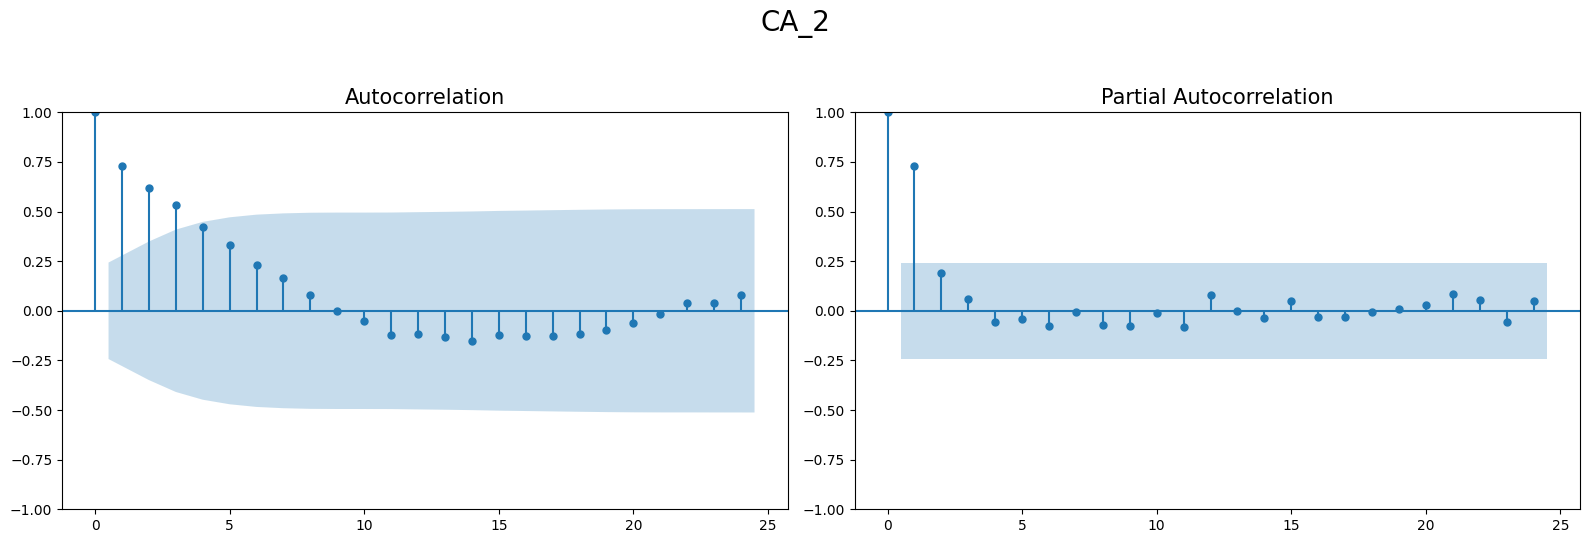

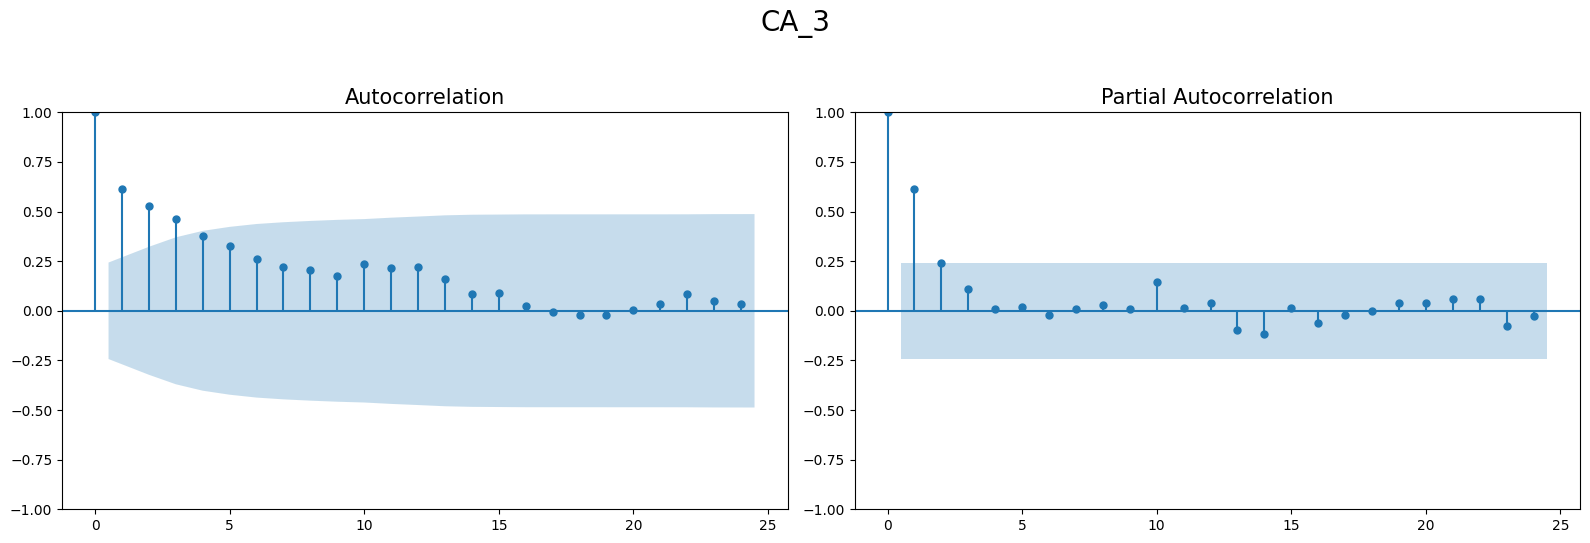

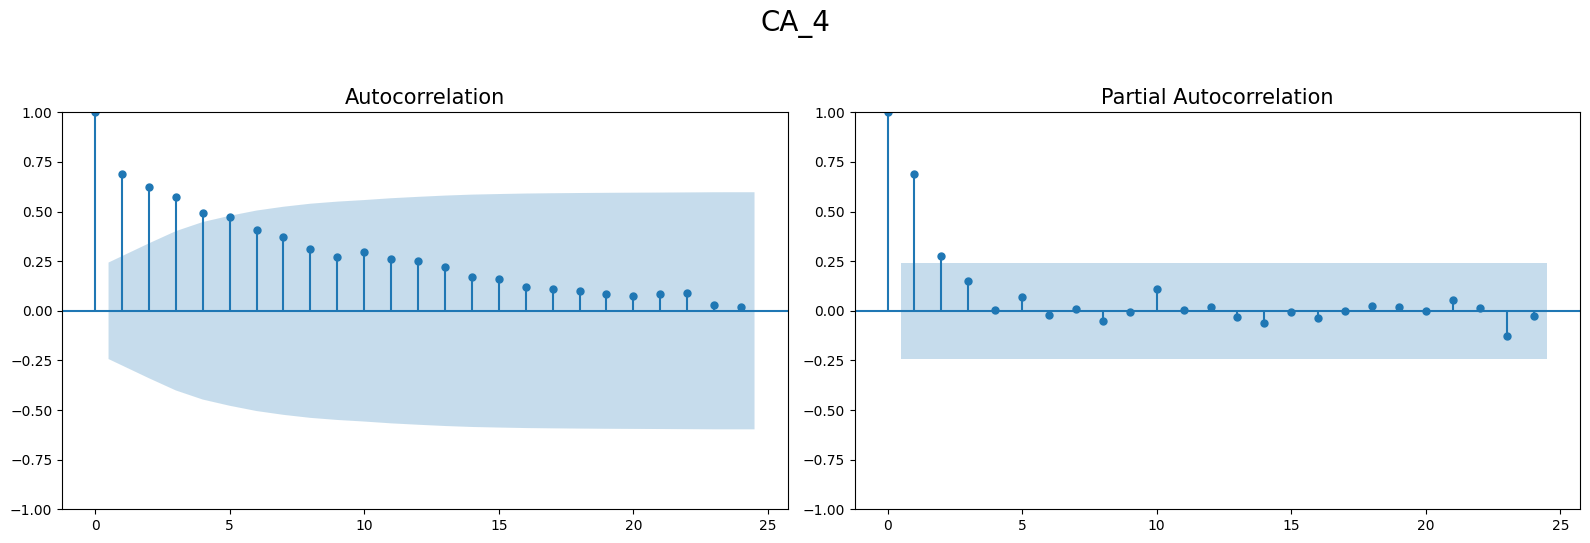

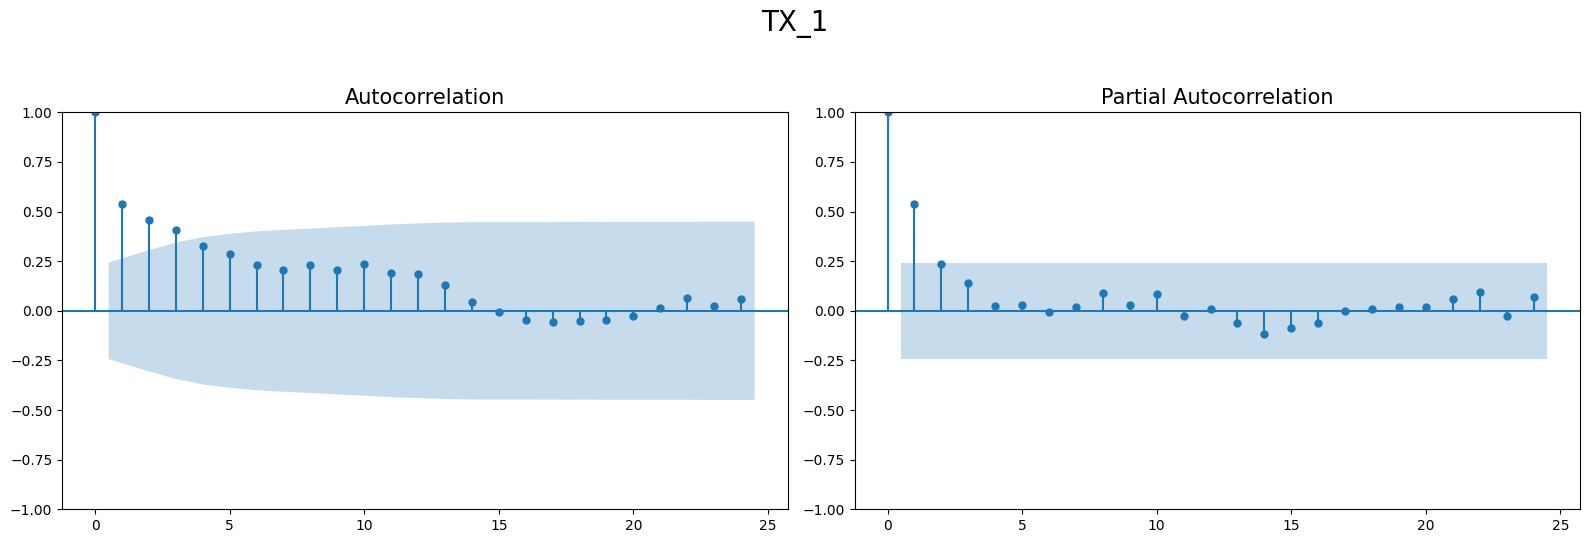

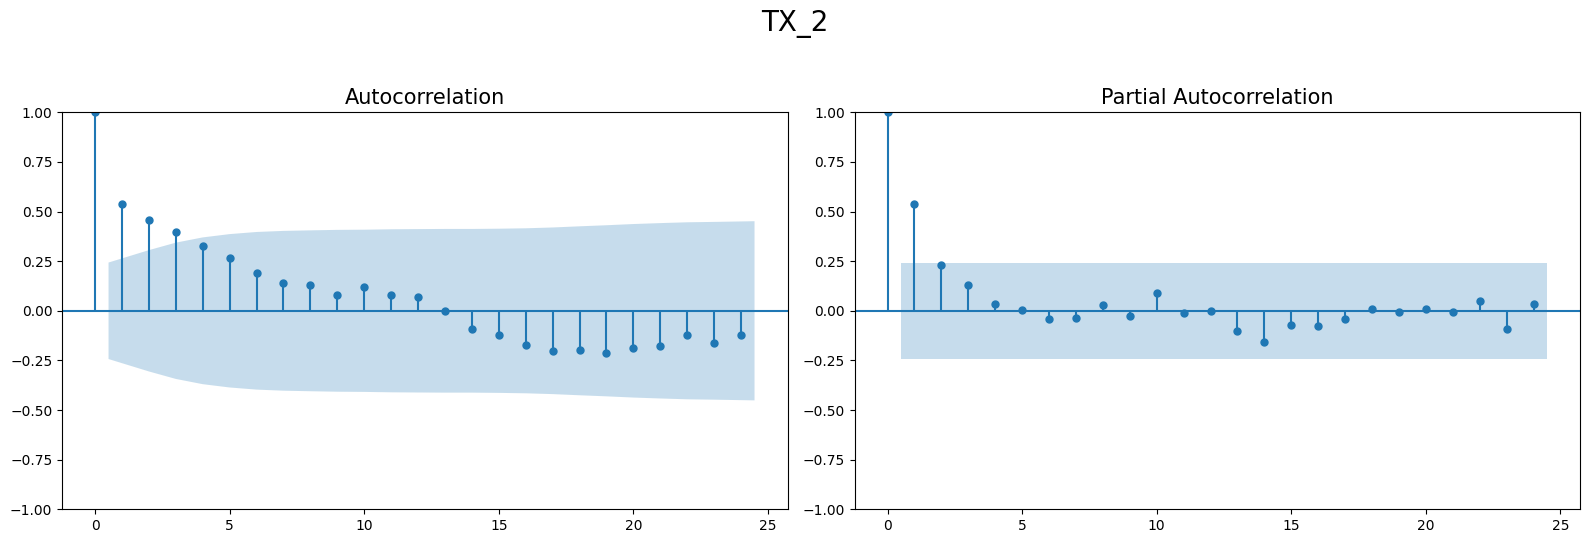

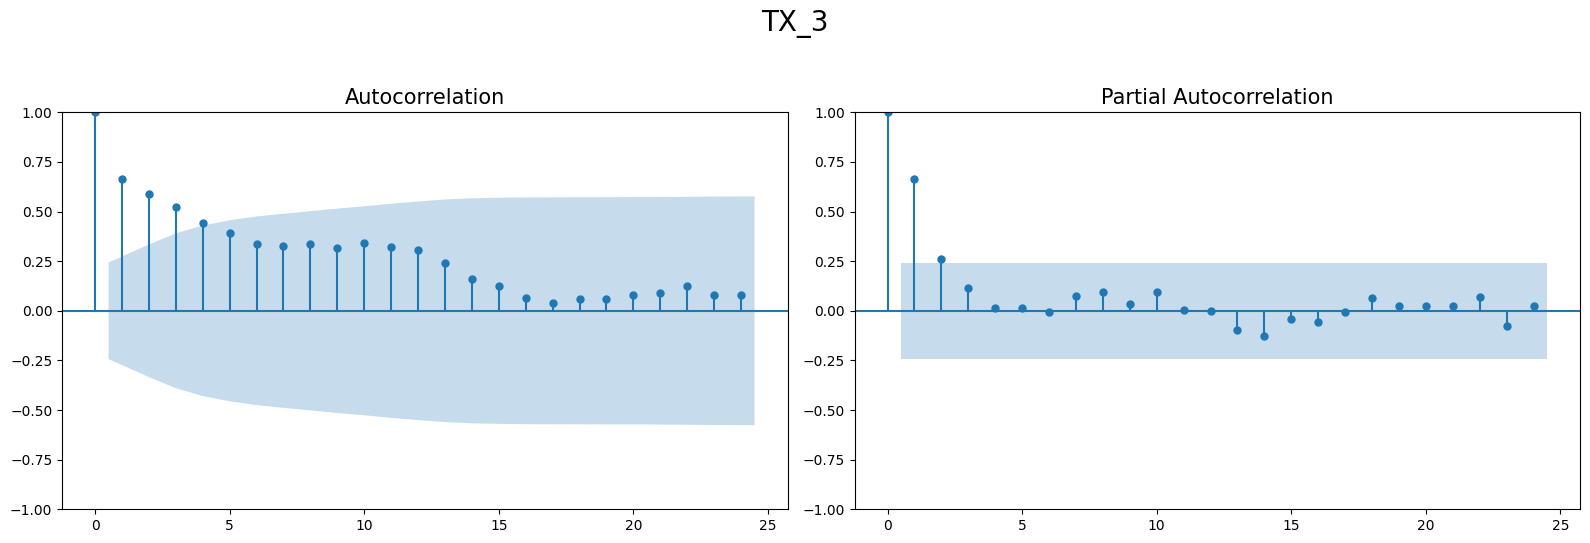

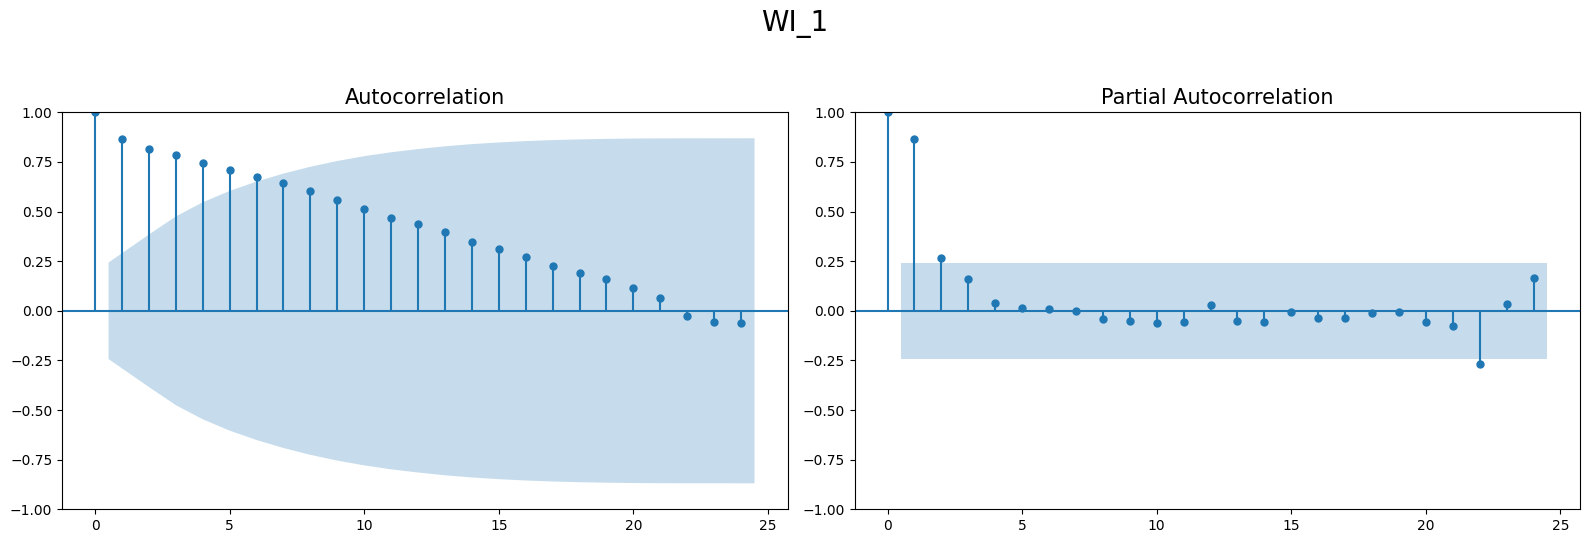

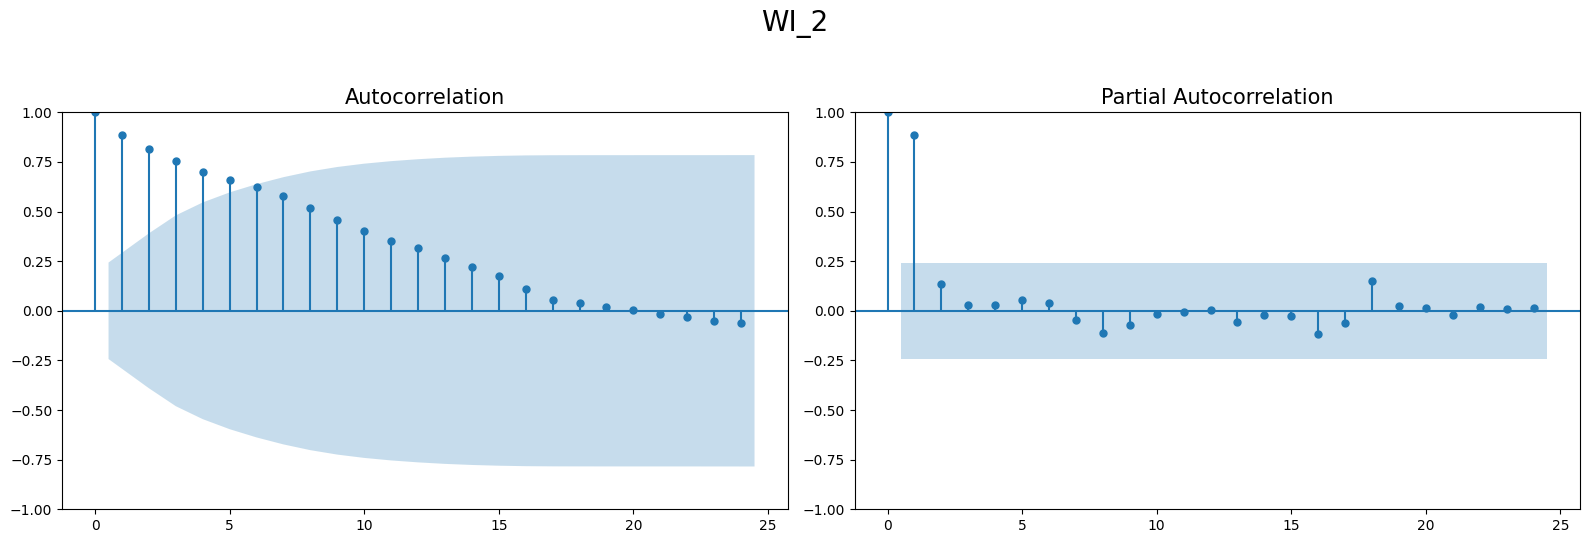

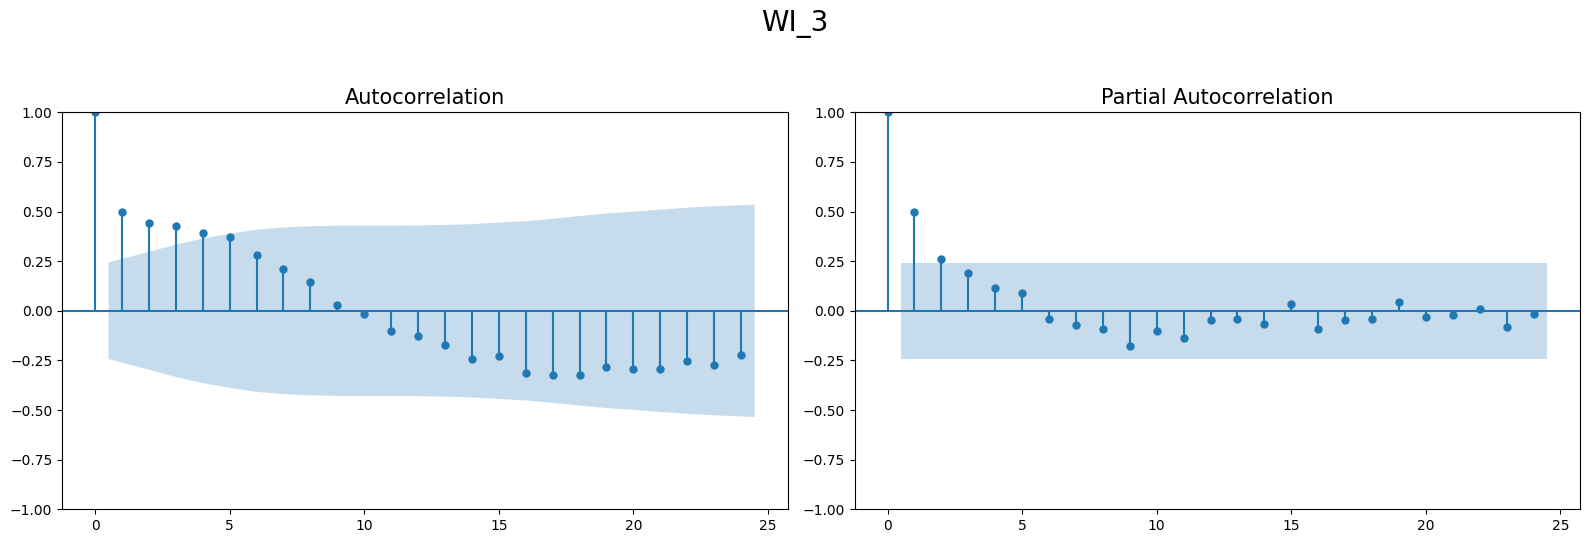

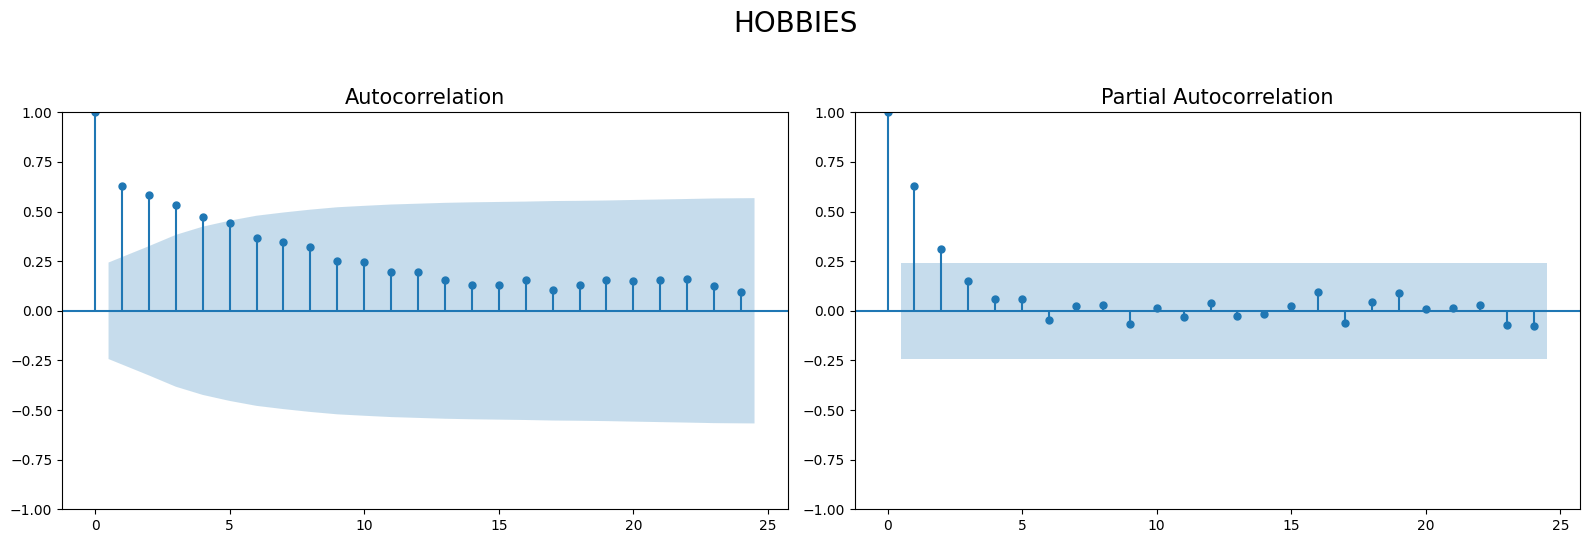

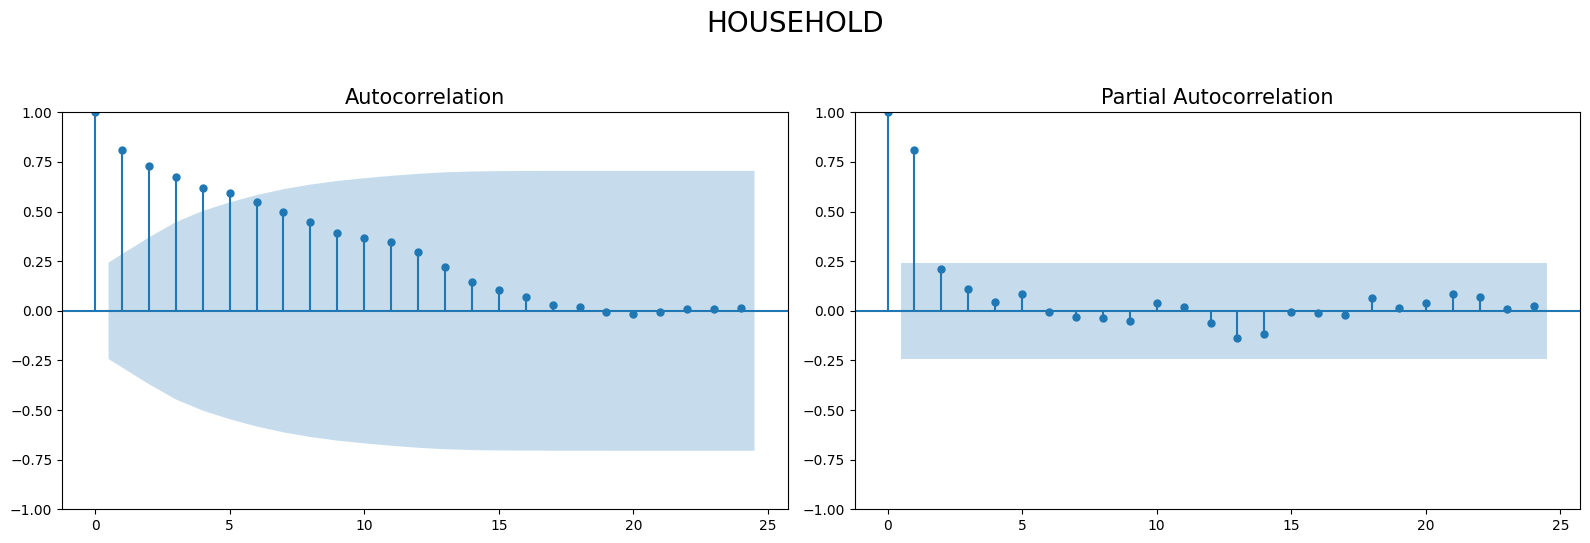

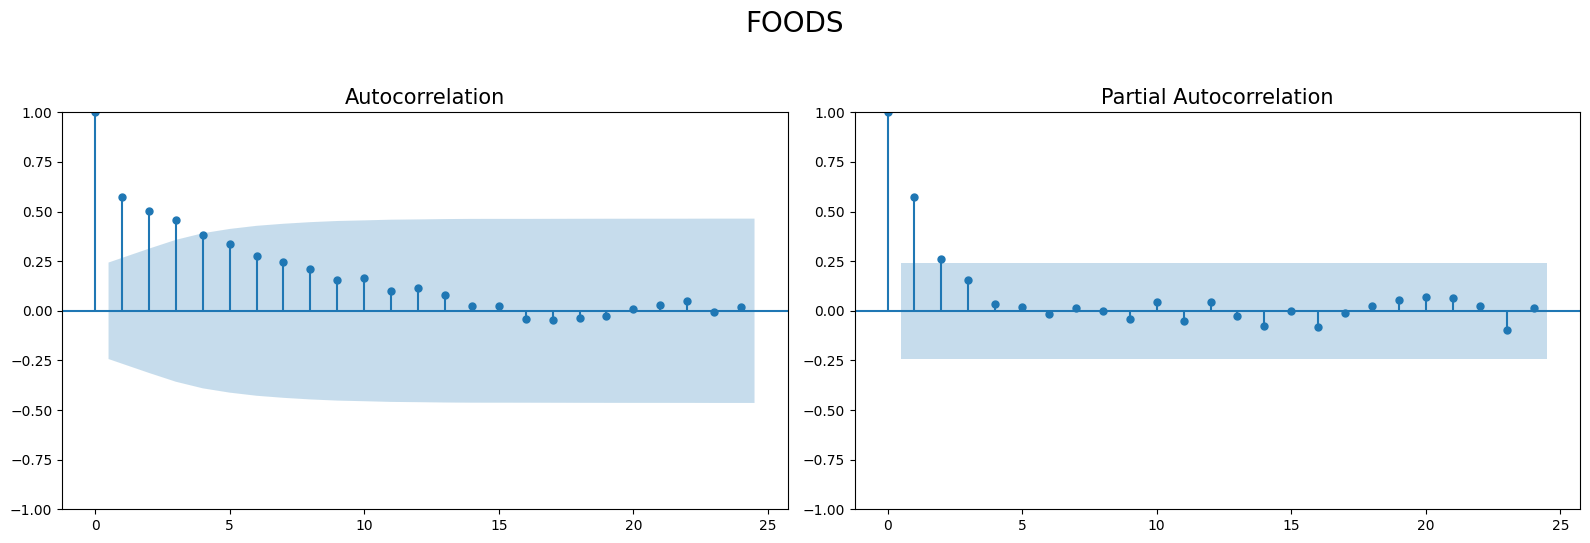

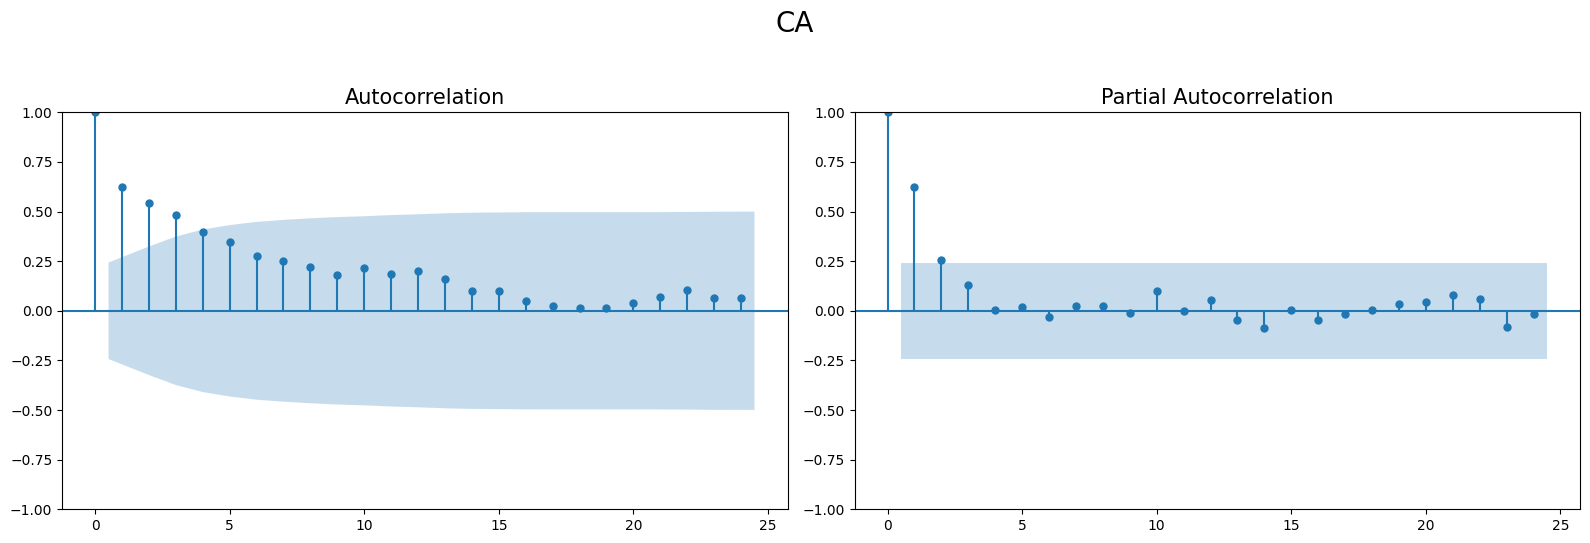

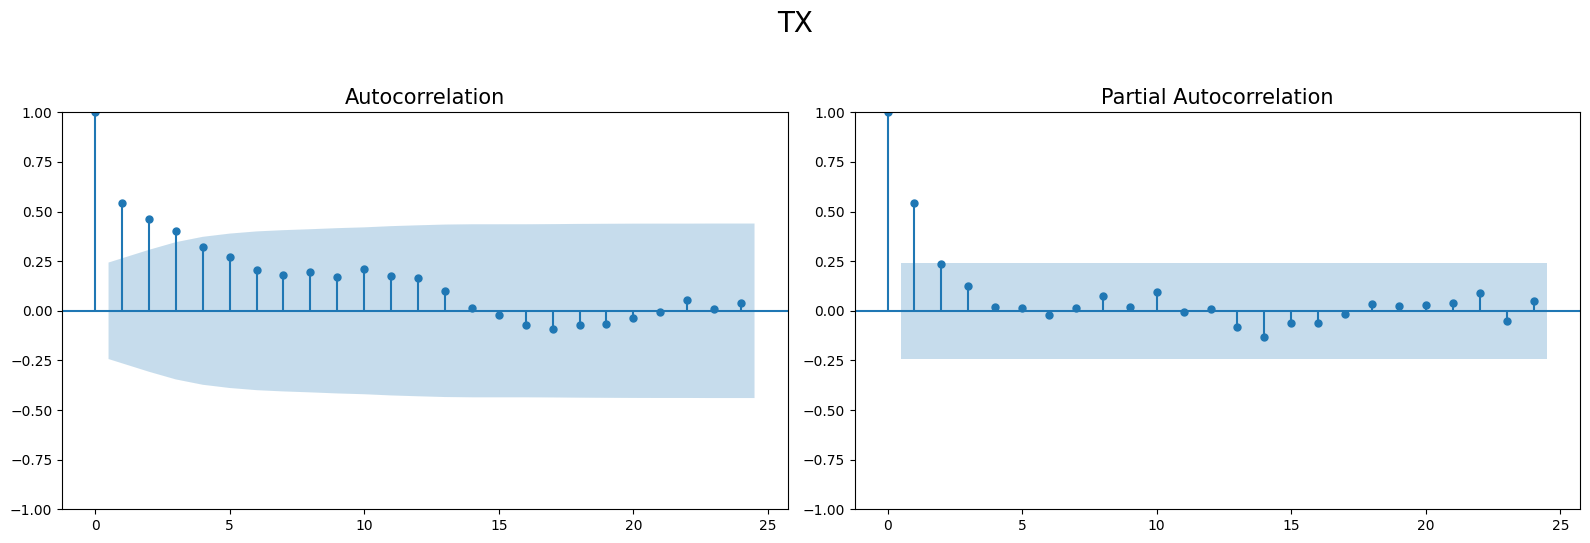

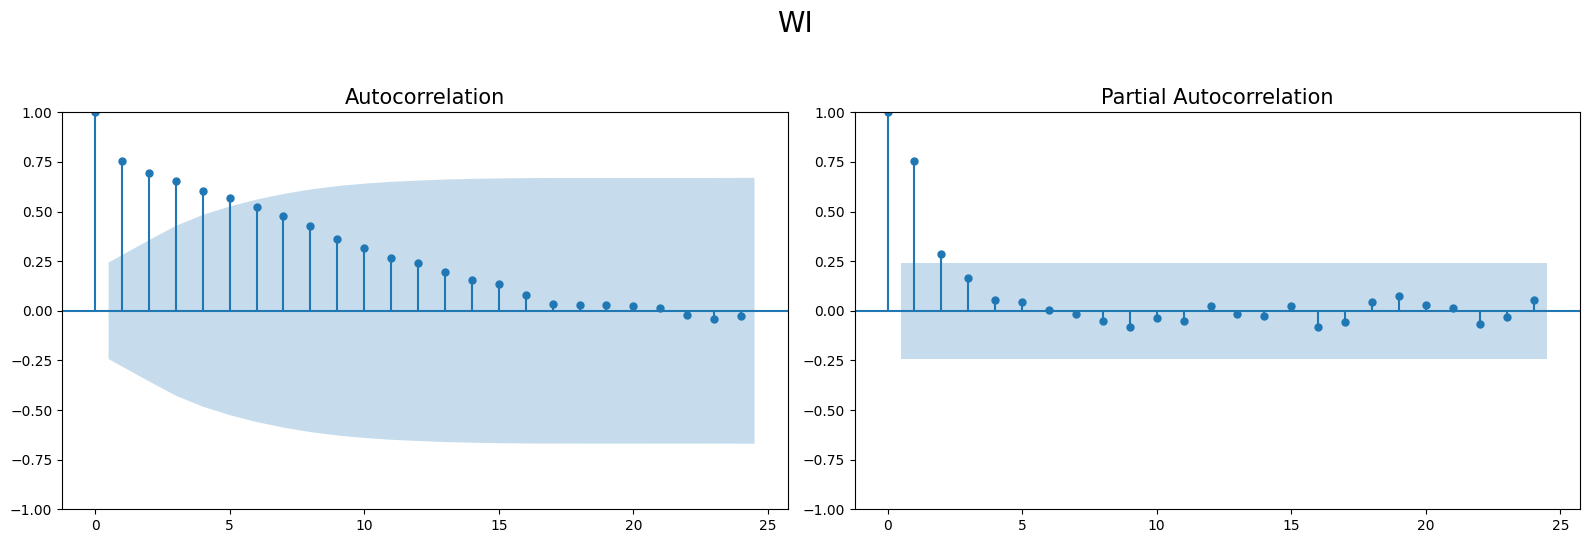

In [27]:
for key in list_dfs:
    acf_pacf(list_dfs[key], key,24)